# Readability Index 
In this notebook, I calculate the readability index using the Flesch Formula.  
Flesch Formula gives you a score that tells you the "ease" of reading.  

In [12]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from textstat.textstat import textstatistics 

In [2]:
df = pd.read_csv('./CSVs/all_clean.csv')
df = df.sort_values(by='year').reset_index(drop=True)

In [3]:
df['word_count'] = df['text'].map(lambda x: len(x.split(' ')))

In [4]:
def syllables_count(word): 
    return textstatistics().syllable_count(word) 

df['syllable_count'] = df['text'].map(lambda x: syllables_count(x))

### Calculating the Flesch Reading Ease:

![](./assets/flesch_reading_ease.png)

In [5]:
df['flesch_reading_ease'] = 206.835 - (1.015* (df['word_count']/df['sentence_count'])) -(84.6*(df['syllable_count']/df['word_count']))

In [7]:
#drop short stories, because I don't know if I have all of them
novels = df[df['word_count'] > 45000]

Text(0.5, 1.0, 'Flesch Reading Ease of Novels Score Over the Years')

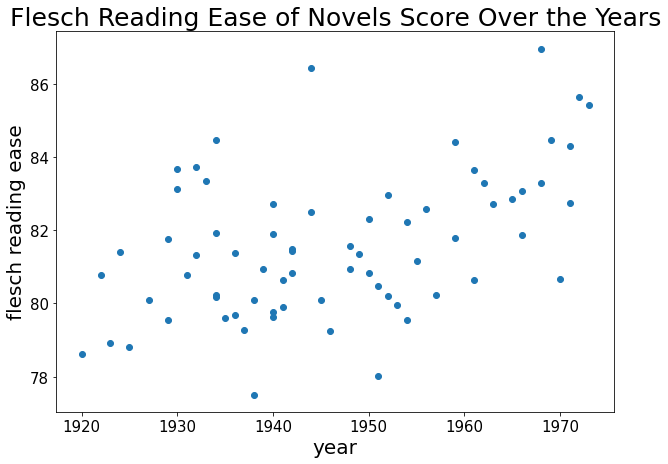

In [10]:
plt.figure(figsize=[10,7])
plt.scatter(novels['year'], novels['flesch_reading_ease'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('year', size = 20)
plt.ylabel('flesch reading ease', size = 20)
plt.title('Flesch Reading Ease of Novels Score Over the Years', size = 25)

<AxesSubplot:>

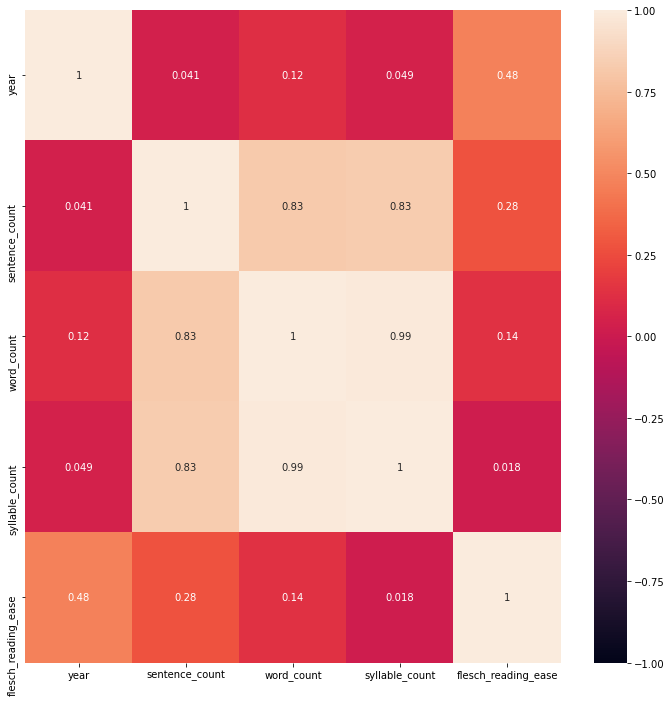

In [17]:
plt.figure(figsize=[12,12])
sns.heatmap(novels.corr(), vmin=-1, vmax=1, annot=True)